In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
import requests
import plotly.graph_objects as go
import matplotlib.ticker as mticker
import datetime
import plotly.express as px
import matplotlib.patches as patches
from ipywidgets import interact, SelectMultiple


In [ ]:
df_plotly = df_crossdata17[['Entity', 'GDP per capita, PPP (constant 2017 international $)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Population (historical estimates)']].dropna()

# Rename the columns for easier access
df_plotly = df_plotly.rename(columns={'Entity': 'Country', 'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'Alcohol consumption per capita', 'Population (historical estimates)': 'Population'})

# Define the thresholds for each axis
x_threshold = df_plotly['GDP per capita'].median()
y_threshold = df_plotly['Alcohol consumption per capita'].median()

# Create an interactive scatter plot using Plotly
fig = px.scatter(df_plotly, x='GDP per capita', y='Alcohol consumption per capita', size='Population', color='Country', hover_name='Country')

# Configure the figure layout
fig.update_layout(
    title='Consumo de álcool vs. GDP per capita',
    xaxis_title='GDP per capita (PPP)',
    yaxis_title='Total alcohol consumption per capita',
    legend_title='Country',
    hovermode='closest'
)

# Add the quadrants
fig.add_shape(type='line', x0=x_threshold, y0=0, x1=x_threshold, y1=1, line=dict(color='black', width=1, dash='dash'), xref='x', yref='paper')
fig.add_shape(type='line', x0=0, y0=y_threshold, x1=1, y1=y_threshold, line=dict(color='black', width=1, dash='dash'), xref='paper', yref='y')

# Show the interactive scatter plot
fig.show()

Slide 1

mensagem: Os países reconhecidos pela tradição vinícola são os maiores exportaroes
Submensagem: Os maiores consumidores são os países com maior renda per capita


Tabela/grafico esquerda: exportações
Tabela/grafico direita: importações

<ipython-input-41-03a97a28c716>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exporters_top15['% do pais do total exportado (2022)'] = df_exporters_top15['% do pais do total exportado (2022)'].multiply(100)
<ipython-input-41-03a97a28c716>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exporters_top15['% do pais do total exportado (2022)'] = df_exporters_top15['% do pais do total exportado (2022)'].round(2)


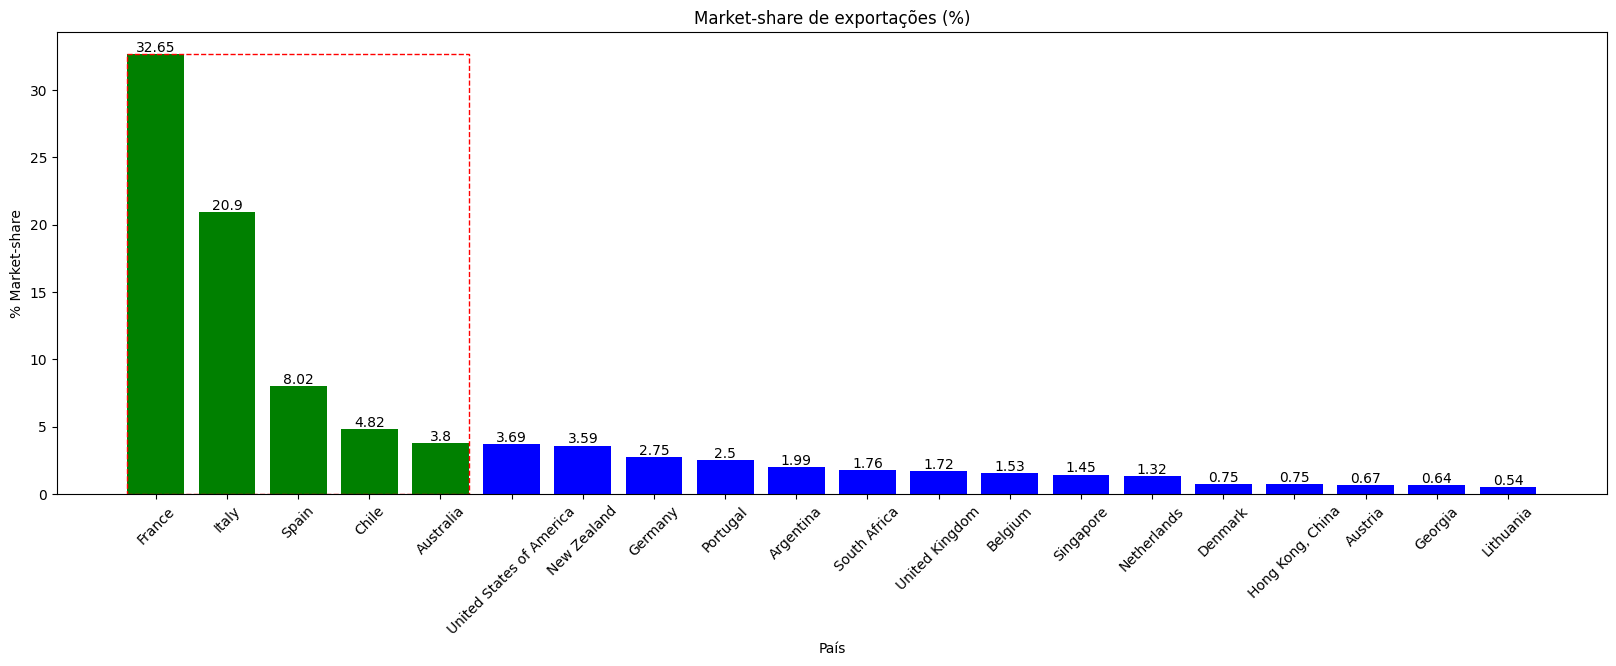

In [ ]:
df_exporters= pd.read_excel('/content/BiggestExportersWine.xlsx',
                  skiprows=13)
df_exporters = df_exporters.set_index('Exporters')
df_exporters = df_exporters.tail(-1)
df_exporters_top15 =df_exporters.head(20)
df_exporters_top15['% do pais do total exportado (2022)'] = df_exporters_top15['% do pais do total exportado (2022)'].multiply(100)
df_exporters_top15['% do pais do total exportado (2022)'] = df_exporters_top15['% do pais do total exportado (2022)'].round(2)


# Define the condition for color coding
threshold = 3.7  #60% do acumulado
colors = np.where(df_exporters_top15['% do pais do total exportado (2022)'] >= threshold, 'green', 'blue')

# Plot the bar chart with color coding
plt.figure(figsize=(20, 6))
bars = plt.bar(df_exporters_top15.index, df_exporters_top15['% do pais do total exportado (2022)'])

plt.bar(df_exporters_top15.index, df_exporters_top15['% do pais do total exportado (2022)'], color=colors)

plt.title('Market-share de exportações (%)')
plt.xlabel('País')
plt.ylabel('% Market-share')

for i, valor in enumerate(df_exporters_top15['% do pais do total exportado (2022)']):
    plt.text(i, valor + 1, str(valor), ha='center', va='top')

# Adding the box around the first 5 bars as a group
# Adding the box around the first 5 bars as a group
ax = plt.gca()
x_start = bars[0].get_x()
x_end = bars[4].get_x() + bars[4].get_width()
y_max = max(bar.get_height() for bar in bars)
rect = patches.Rectangle((x_start, 0), x_end - x_start, y_max, linewidth=1, linestyle='dashed', edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.xticks(rotation=45)
plt.show()

<ipython-input-46-6ff0c23009ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importers_top15['% do pais do total importado (2022)'] = df_importers_top15['% do pais do total importado (2022)'].multiply(100)
<ipython-input-46-6ff0c23009ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importers_top15['% do pais do total importado (2022)'] = df_importers_top15['% do pais do total importado (2022)'].round(2)


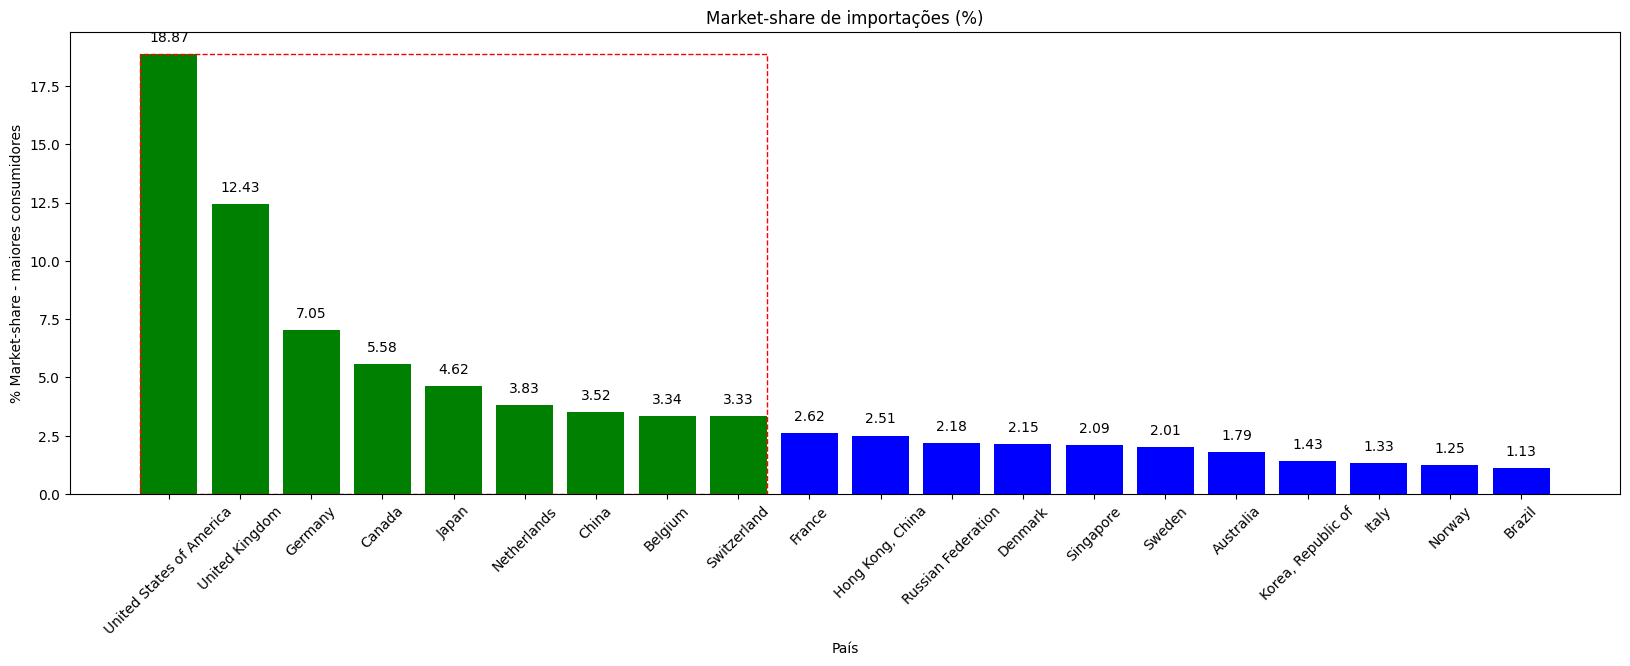

In [ ]:
df_importers= pd.read_excel('/content/BiggestImportesrWine.xlsx',
                  skiprows=13)
df_importers = df_importers.set_index('Importers')
df_importers = df_importers.tail(-1)
df_importers_top15 =df_importers.head(20)
df_importers_top15['% do pais do total importado (2022)'] = df_importers_top15['% do pais do total importado (2022)'].multiply(100)
df_importers_top15['% do pais do total importado (2022)'] = df_importers_top15['% do pais do total importado (2022)'].round(2)


# Define the condition for color coding
threshold = 3.33  #60% do acumulado
colors = np.where(df_importers_top15['% do pais do total importado (2022)'] >= threshold, 'green', 'blue')

# Plot the bar chart with color coding
plt.figure(figsize=(20, 6))
bars = plt.bar(df_importers_top15.index, df_importers_top15['% do pais do total importado (2022)'])

plt.bar(df_importers_top15.index, df_importers_top15['% do pais do total importado (2022)'], color=colors)

plt.title('Market-share de importações (%)')
plt.xlabel('País')
plt.ylabel('% Market-share - maiores consumidores')

for i, valor in enumerate(df_importers_top15['% do pais do total importado (2022)']):
    plt.text(i, valor + 1, str(valor), ha='center', va='top')

# Adding the box around the first 5 bars as a group
# Adding the box around the first 5 bars as a group
ax = plt.gca()
x_start = bars[0].get_x()
x_end = bars[8].get_x() + bars[8].get_width()
y_max = max(bar.get_height() for bar in bars)
rect = patches.Rectangle((x_start, 0), x_end - x_start, y_max, linewidth=1, linestyle='dashed', edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.xticks(rotation=45)
plt.show()

Slide 2

mensagem: Crescimento consistente das exportações de vinho brasileiro
Submensagem: Internacionalização, ações de marketing e branding e parcerias com empresas estraingeiras permitiram a expansão do Brasil


Tabela/grafico esquerda em cima: série histórica volume
Tabela/grafico esquerda em baixo: série histórica últimos 15 anos volume

Tabela/grafico direita em cima: série histórica valor
Tabela/grafico direita em baixo: série histórica últimos 15 anos valor

In [ ]:
#Monta o dataframe geral
df= pd.read_csv('/content/ExpVinho (1).csv', sep =';')
df = df.set_index('País')
#Separa o volume e valor

df_volume = df.iloc[:, ::2]
df_volume_corrigido = df_volume.copy()

# Remover o '.1' dos anos na coluna
df_volume_corrigido.columns = [col.split('.')[0] for col in df_volume_corrigido.columns]
df_volume = df_volume_corrigido

#Separa ultimos 15 anos da serie
df_volume_15_anos =df_volume.iloc[:,-15:]


#separa valor
df_valor = df.iloc[:, 1::2]
df_valor_15_anos =df_valor.iloc[:,-15:]


CAGR do volume total: 14.735164126611423 %


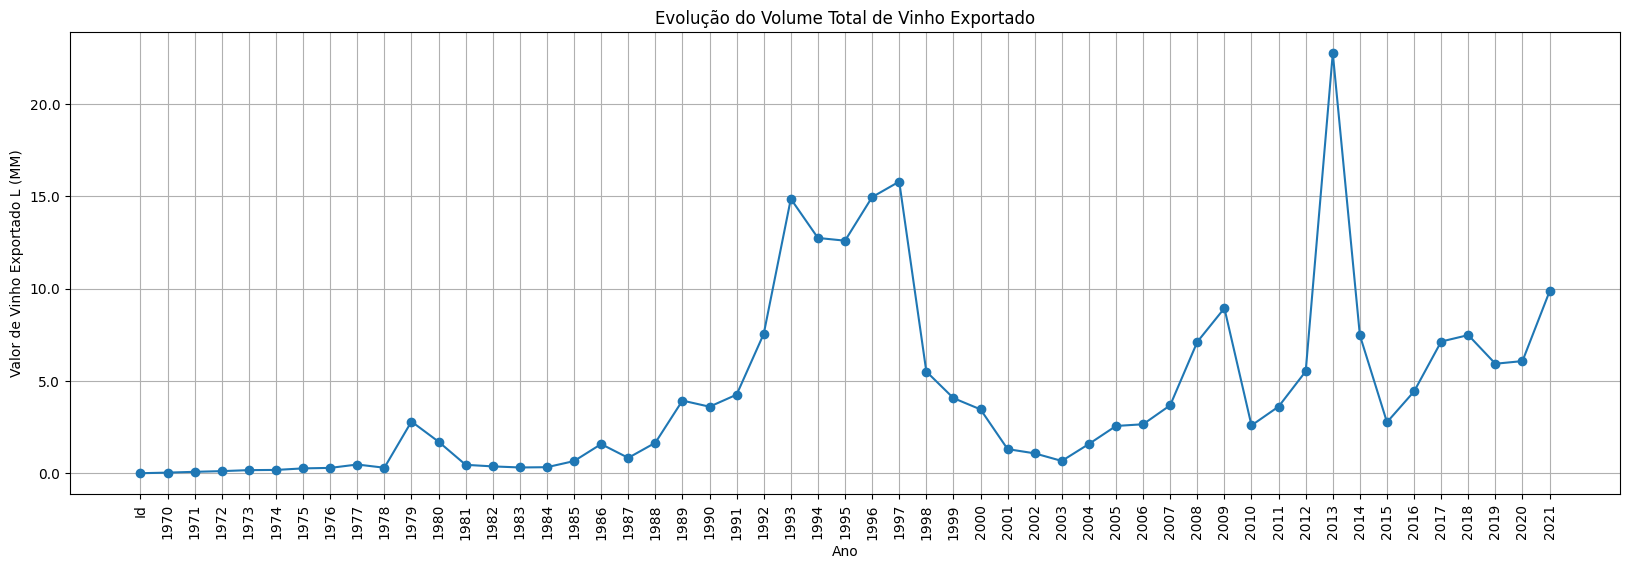

In [ ]:
soma_volume_por_ano = df_volume.sum()

# Obtenha o valor do último ano
valor_final = soma_volume_por_ano.iloc[-1]

# Obtenha o valor do primeiro ano
valor_inicial = soma_volume_por_ano.iloc[0]

# Obtenha o número de anos
num_anos = len(soma_volume_por_ano)

# Calcule o CAGR
cagr = (valor_final / valor_inicial) ** (1 / (num_anos - 1)) - 1
cagr = cagr*100
print(f'CAGR do volume total: {cagr} %')

total_value_per_year = df_volume.sum()

# Crie a função de formatação para exibir os valores em milhões
formatter = mticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}')

# Crie o gráfico de linhas
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(total_value_per_year.index, total_value_per_year.values, marker='o')

ax.yaxis.set_major_formatter(formatter)  # Aplique a formatação

plt.title('Evolução do Volume Total de Vinho Exportado')
plt.xlabel('Ano')
plt.ylabel('Valor de Vinho Exportado L (MM)')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.grid()

plt.show()

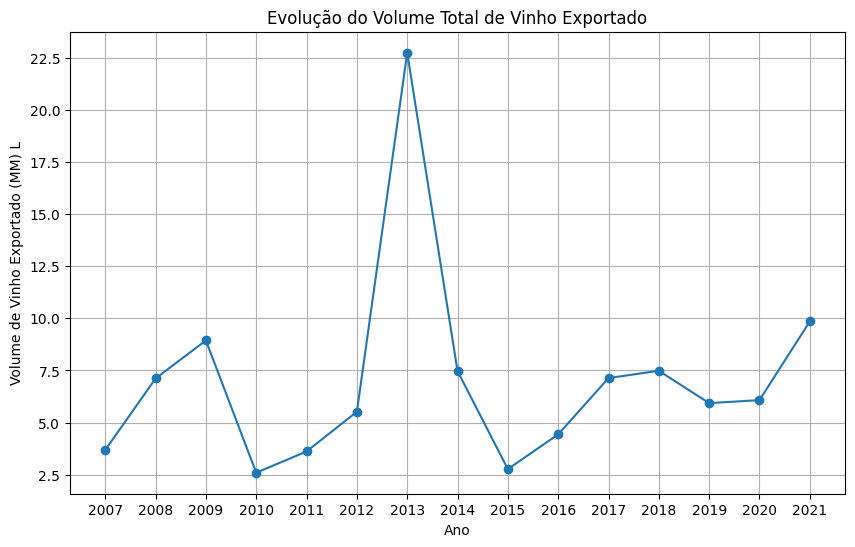

In [ ]:
total_volume_per_year = df_volume_15_anos.sum()

# Create the formatter function to display values in millions
formatter = mticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}')

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(total_volume_per_year.index, total_volume_per_year.values, marker='o')

plt.gca().yaxis.set_major_formatter(formatter)  # Apply the formatting to the y-axis

plt.title('Evolução do Volume Total de Vinho Exportado')
plt.xlabel('Ano')
plt.ylabel('Volume de Vinho Exportado (MM) L')
plt.grid()

plt.show()

CAGR do volume total: 8.332502520028573 %


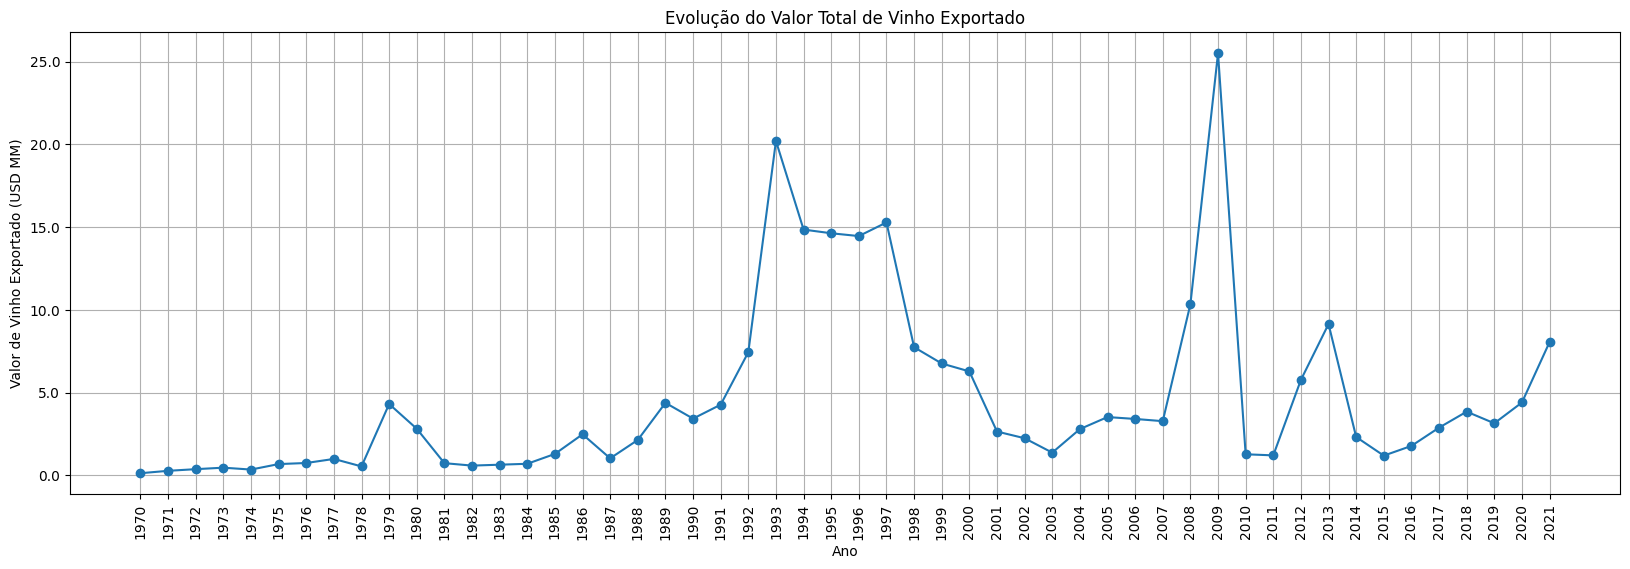

In [ ]:
soma_volume_por_ano = df_valor.sum()

# Obtenha o valor do último ano
valor_final = soma_volume_por_ano.iloc[-1]

# Obtenha o valor do primeiro ano
valor_inicial = soma_volume_por_ano.iloc[0]

# Obtenha o número de anos
num_anos = len(soma_volume_por_ano)

# Calcule o CAGR
cagr = (valor_final / valor_inicial) ** (1 / (num_anos - 1)) - 1
cagr = cagr*100
print(f'CAGR do volume total: {cagr} %')

total_value_per_year = df_valor.sum()

# Crie a função de formatação para exibir os valores em milhões
formatter = mticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}')

# Crie o gráfico de linhas
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(total_value_per_year.index, total_value_per_year.values, marker='o')

ax.yaxis.set_major_formatter(formatter)  # Aplique a formatação

plt.title('Evolução do Valor Total de Vinho Exportado')
plt.xlabel('Ano')
plt.ylabel('Valor de Vinho Exportado (USD MM)')
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.grid()

plt.show()

CAGR do volume total: 6.627329369515489 %


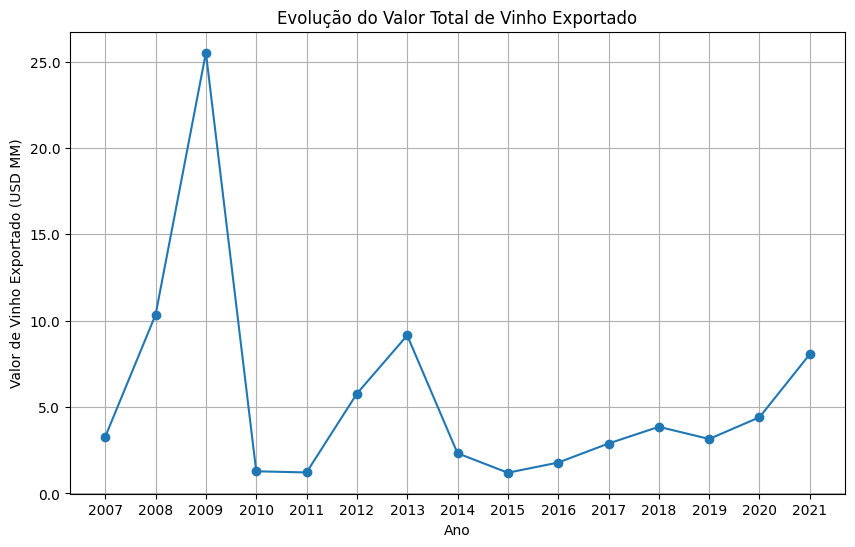

In [ ]:
soma_volume_por_ano = df_valor_15_anos.sum()

# Obtenha o valor do último ano
valor_final = soma_volume_por_ano.iloc[-1]

# Obtenha o valor do primeiro ano
valor_inicial = soma_volume_por_ano.iloc[0]

# Obtenha o número de anos
num_anos = len(soma_volume_por_ano)

# Calcule o CAGR
cagr = (valor_final / valor_inicial) ** (1 / (num_anos - 1)) - 1
cagr = cagr*100
print(f'CAGR do valor total: {cagr} %')

total_value_per_year = df_valor_15_anos.sum()

# Crie a função de formatação para exibir os valores em milhões
formatter = mticker.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}')

# Crie o gráfico de linhas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(total_value_per_year.index, total_value_per_year.values, marker='o')

ax.yaxis.set_major_formatter(formatter)  # Aplique a formatação

plt.title('Evolução do Valor Total de Vinho Exportado')
plt.xlabel('Ano')
plt.ylabel('Valor de Vinho Exportado (USD MM)')
plt.grid()

plt.show()

Slide 3

Mensagem:
Submensagem:

Gráfico esquerda volume em cima: tree map 2007-->2021

Gráfico esquerda valor em baixo: tree map 2007-->2021
Mensagem: Entender o porquê da mudança ao longo do tempo - estrategia de mercado, mudança de padrao de consumo, flutuações politica e economica


In [ ]:
fig_data = []

# Para cada ano no DataFrame
for year in df_volume_15_anos.columns:
    # Criar um treemap para o ano
    fig_data.append(go.Treemap(
        labels=df_volume_15_anos.index,
        parents=[''] * len(df_volume_15_anos.index),
        values=df_volume_15_anos[year],
        name=str(year),
        visible=False  # Apenas o treemap para o primeiro ano será visível inicialmente
    ))

# Defina o primeiro treemap como visível
fig_data[0].visible = True

# Criar a figura
fig = go.Figure(data=fig_data)

# Adicionando um título
fig.update_layout(
    title="Maiores compradores - Volume (L)",
    title_font=dict(size=20)
)

# Criar um controle deslizante
steps = []
for i, year in enumerate(df_volume_15_anos.columns):
    step = dict(
        method="update",
        args=[{"visible": [el == i for el in range(len(fig_data))]}],
        label=str(year)
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Ano: "},
    steps=steps
)]

fig.update_layout(sliders=sliders)

fig.show()

In [ ]:

# Criar uma lista para armazenar os treemaps de cada ano
fig_data = []

# Para cada ano no DataFrame
for year in df_valor_15_anos.columns:
    # Criar um treemap para o ano
    fig_data.append(go.Treemap(
        labels=df_valor_15_anos.index,
        parents=[''] * len(df_valor_15_anos.index),
        values=df_valor_15_anos[year],
        name=str(year),
        visible=False  # Apenas o treemap para o primeiro ano será visível inicialmente
    ))

# Defina o primeiro treemap como visível
fig_data[0].visible = True

# Criar a figura
fig = go.Figure(data=fig_data)


# Adicionando um título
fig.update_layout(
    title="Maiores compradores - Valor USD",
    title_font=dict(size=20)
)


# Criar um controle deslizante
steps = []
for i, year in enumerate(df_valor_15_anos.columns):
    step = dict(
        method="update",
        args=[{"visible": [el == i for el in range(len(fig_data))]}],
        label=str(year)
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Ano: "},
    steps=steps
)]

fig.update_layout(sliders=sliders)

fig.show()

# Ticket médio

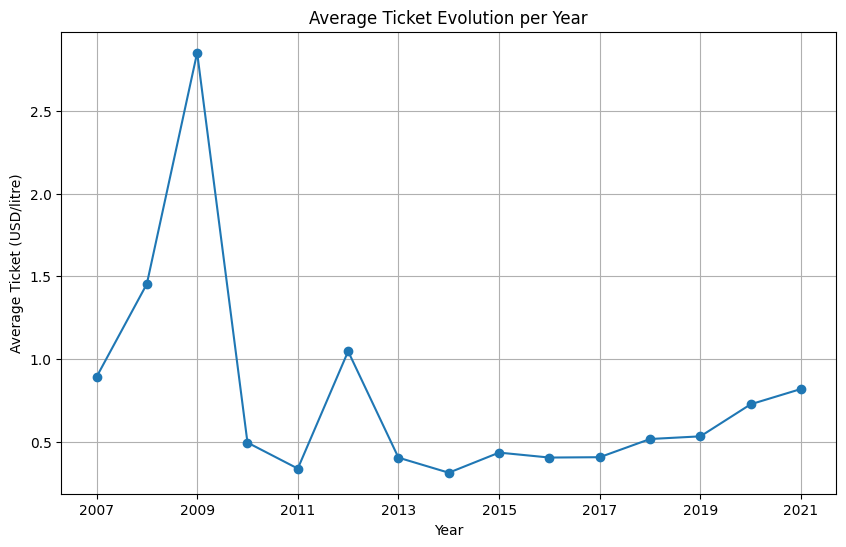

In [ ]:
df_valor_transposed = df_valor_15_anos.transpose()
df_volume_transposed = df_volume_15_anos_corrigido.transpose()

# Calculate the sum of the values and volumes for each year
total_value_per_year = df_valor_transposed.sum(axis=1)
total_volume_per_year = df_volume_transposed.sum(axis=1)

average_ticket_per_year = total_value_per_year / total_volume_per_year


# Visualize the result
average_ticket_per_year.plot(kind='line', marker='o', grid=True, figsize=(10, 6))

plt.title('Average Ticket Evolution per Year')
plt.xlabel('Year')
plt.ylabel('Average Ticket (USD/litre)')

plt.show()

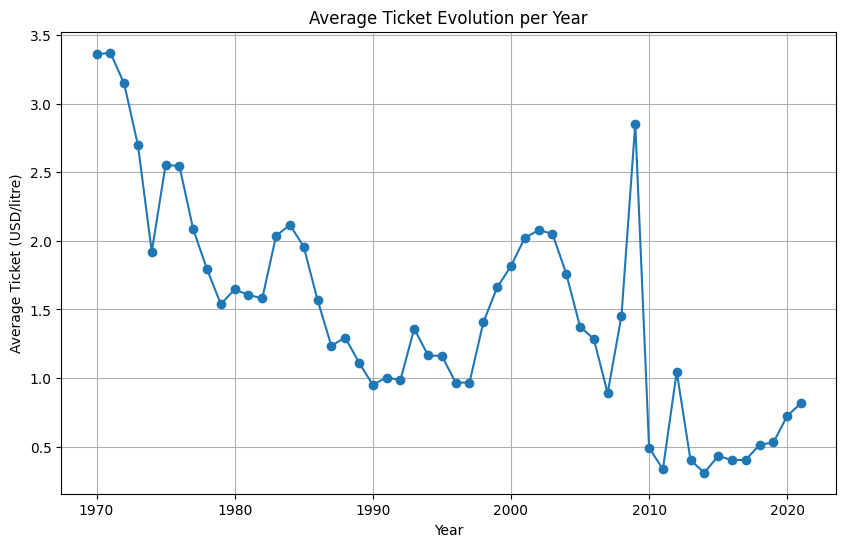

In [ ]:
df_valor_transposed = df_valor.transpose()
df_volume_transposed = df_volume.transpose()

# Calculate the sum of the values and volumes for each year
total_value_per_year = df_valor_transposed.sum(axis=1)
total_volume_per_year = df_volume_transposed.sum(axis=1)

average_ticket_per_year = total_value_per_year / total_volume_per_year


# Visualize the result
average_ticket_per_year.plot(kind='line', marker='o', grid=True, figsize=(10, 6))

plt.title('Average Ticket Evolution per Year')
plt.xlabel('Year')
plt.ylabel('Average Ticket (USD/litre)')

plt.show()

Slide 4

Mensagem: O Brasil exporta majoritariamente para países com alta renda, grande consumo de alcool e participação relevante em vinhos
Submensagem:

Esquerda: Consumo alcool per capita x GDP per capita

Direita: (1) Tendencia consumo de vinho per capita/(2) tabela high-low/ (3) crescimento do consumo litros CAGR
mensagem: manutenção dos top mercados que o Brasil exporta

Embaixo: Consumo de vinho no total de consumo de alcool e quadrante

# Consumo de vinho per capita

Fonte: image.png

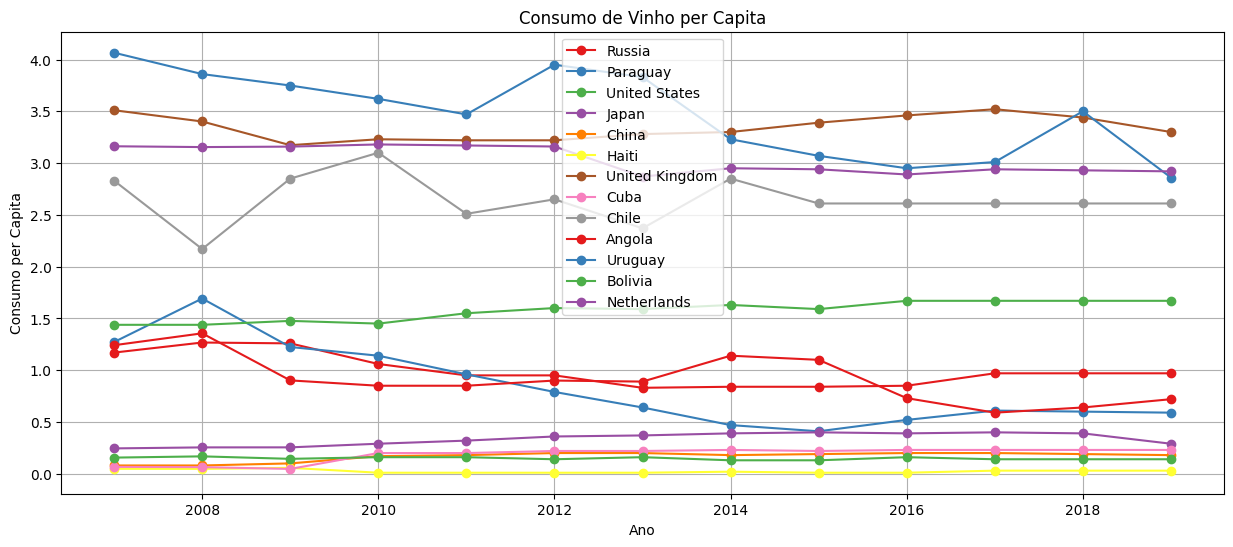

In [ ]:
df_capita = pd.read_csv('/content/wine-consumption-per-person (2).csv', sep=',')

paises_especificos = ['Russia', 'Paraguay', 'United States', 'Japan', 'China','Haiti','United Kingdom','Cuba','Chile', 'Angola','Uruguay','Bolivia','Netherlands']  # Substitua pelos países desejados

# Define a color palette with enough colors for the number of countries
colors = sns.color_palette('Set1', n_colors=len(paises_especificos))

# Plot the line graph for each country with a different color
plt.figure(figsize=(15, 6))
for i, pais in enumerate(paises_especificos):
    df_pais_especifico = df_capita[df_capita['Entity'] == pais]
    df_pais_especifico = df_pais_especifico.sort_values('Year')
    df_ultimos_13_anos = df_pais_especifico.tail(13)
    plt.plot(df_ultimos_13_anos['Year'], df_ultimos_13_anos['Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Wine'], marker='o', color=colors[i], label=pais)

plt.title('Consumo de Vinho per Capita')
plt.xlabel('Ano')
plt.ylabel('Consumo per Capita')

plt.grid(True)
plt.legend()
plt.show()

# Consumo de alcool vs. PIB per capita (2017)

Fonte: https://ourworldindata.org/grapher/alcohol-consumption-vs-gdp-per-capita

In [ ]:
df_crossdata = pd.read_csv('/content/alcohol-consumption-vs-gdp-per-capita.csv',
                           sep=',')
df_crossdata17 = df_crossdata[df_crossdata['Year']==2018]
df_crossdata17 = df_crossdata17[df_crossdata17['Entity']!='World']
df_crossdata17

,Entity,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
3,Afghanistan,AFG,2018,0.210,2033.804443,3.668679e+07,NaN
515,Africa,NaN,2018,NaN,NaN,1.295265e+09,NaN
587,Africa (UN),NaN,2018,NaN,NaN,1.295265e+09,NaN
600,Albania,ALB,2018,7.170,13317.092773,2.877019e+06,NaN
859,Algeria,DZA,2018,0.950,11630.679688,4.192701e+07,NaN
...,...,...,...,...,...,...,...
57256,Wallis and Futuna,WLF,2018,NaN,NaN,1.184000e+04,NaN
57382,Western Sahara,ESH,2018,NaN,NaN,5.320110e+05,NaN
57650,Yemen,YEM,2018,0.051,NaN,3.079051e+07,NaN
58035,Zambia,ZMB,2018,6.540,3521.545898,1.783590e+07,NaN


In [ ]:
df_plotly = df_crossdata17[['Entity', 'GDP per capita, PPP (constant 2017 international $)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Population (historical estimates)']].dropna()

# Rename the columns for easier access
df_plotly = df_plotly.rename(columns={'Entity': 'Country', 'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'Alcohol consumption per capita', 'Population (historical estimates)': 'Population'})

# Define the thresholds for each axis
x_threshold = df_plotly['GDP per capita'].median()
y_threshold = df_plotly['Alcohol consumption per capita'].median()

# Create an interactive scatter plot using Plotly
fig = px.scatter(df_plotly, x='GDP per capita', y='Alcohol consumption per capita', size='Population', color='Country', hover_name='Country')

# Configure the figure layout
fig.update_layout(
    title='Consumo de álcool vs. GDP per capita',
    xaxis_title='GDP per capita (PPP)',
    yaxis_title='Total alcohol consumption per capita',
    legend_title='Country',
    hovermode='closest'
)

# Add the quadrants
fig.add_shape(type='line', x0=x_threshold, y0=0, x1=x_threshold, y1=1, line=dict(color='black', width=1, dash='dash'), xref='x', yref='paper')
fig.add_shape(type='line', x0=0, y0=y_threshold, x1=1, y1=y_threshold, line=dict(color='black', width=1, dash='dash'), xref='paper', yref='y')

# Show the interactive scatter plot
fig.show()

In [ ]:
# Define the thresholds for each axis
x_threshold = df_plotly['GDP per capita'].median()
y_threshold = df_plotly['Alcohol consumption per capita'].median()

# Highlight specific countries
paises_especificos = ['Russia', 'Paraguay', 'United States', 'Japan', 'China', 'Haiti', 'United Kingdom', 'Cuba', 'Chile', 'Angola', 'Uruguay', 'Bolivia', 'Netherlands']
highlighted_countries = df_plotly[df_plotly['Country'].isin(paises_especificos)]

# Create a new DataFrame with specific countries and their respective quadrants
highlighted_countries['Quadrant'] = ''
highlighted_countries.loc[highlighted_countries['GDP per capita'] > x_threshold, 'Quadrant'] = 'H GDP'
highlighted_countries.loc[highlighted_countries['GDP per capita'] <= x_threshold, 'Quadrant'] = 'L GDP'
highlighted_countries.loc[highlighted_countries['Alcohol consumption per capita'] > y_threshold, 'Quadrant'] += ', H Alcohol'
highlighted_countries.loc[highlighted_countries['Alcohol consumption per capita'] <= y_threshold, 'Quadrant'] += ', L Alcohol'

# Display the table
table_data = highlighted_countries[['Country', 'Quadrant']]
table = pd.DataFrame(table_data)
table

<ipython-input-182-0f6b9746385d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Quadrant
1491,Angola,"L GDP, H Alcohol"
6288,Bolivia,"L GDP, L Alcohol"
10122,Chile,"H GDP, H Alcohol"
10381,China,"H GDP, H Alcohol"
22066,Haiti,"L GDP, L Alcohol"
25794,Japan,"H GDP, H Alcohol"
36431,Netherlands,"H GDP, H Alcohol"
40952,Paraguay,"L GDP, H Alcohol"
42987,Russia,"H GDP, H Alcohol"
54782,United Kingdom,"H GDP, H Alcohol"


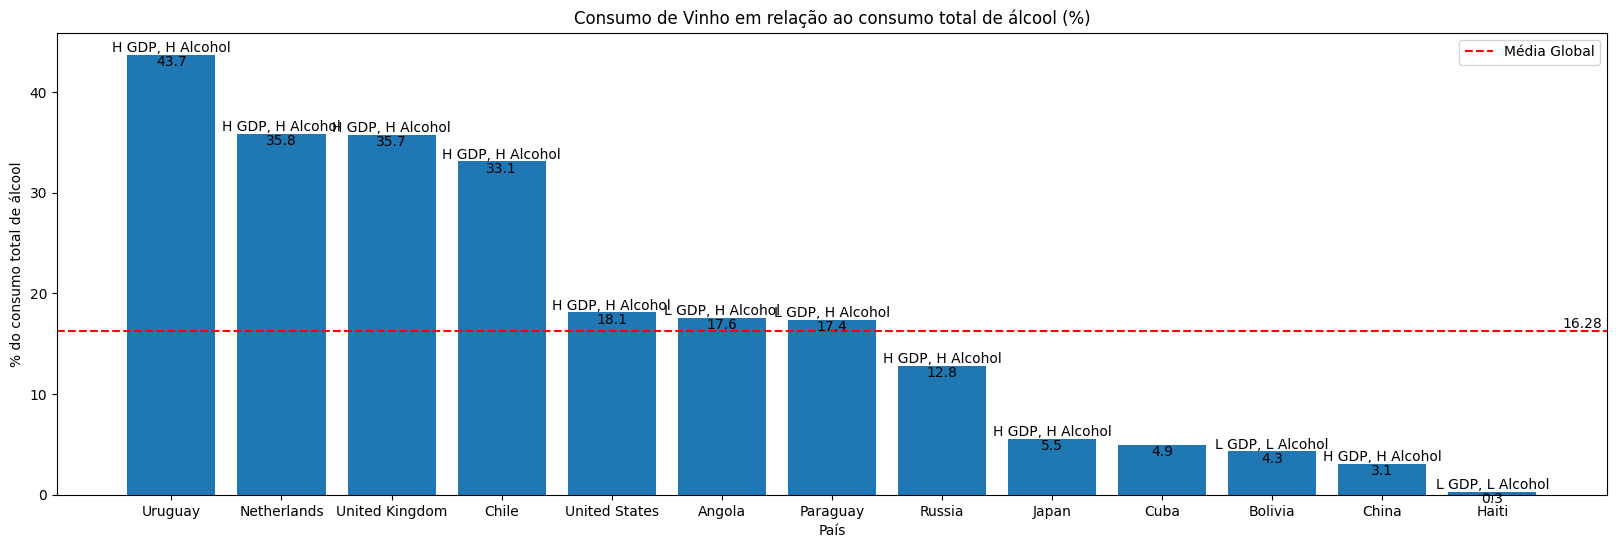

In [ ]:

# Define the specific countries and their respective quadrants
data = {
    'Country': ['Angola', 'Bolivia', 'Chile', 'China', 'Haiti', 'Japan', 'Netherlands', 'Paraguay', 'Russia', 'United Kingdom', 'United States', 'Uruguay'],
    'Quadrant': ['L GDP, H Alcohol', 'L GDP, L Alcohol', 'H GDP, H Alcohol', 'H GDP, H Alcohol', 'L GDP, L Alcohol', 'H GDP, H Alcohol', 'H GDP, H Alcohol', 'L GDP, H Alcohol', 'H GDP, H Alcohol', 'H GDP, H Alcohol', 'H GDP, H Alcohol', 'H GDP, H Alcohol']
}

# Create a DataFrame from the data
df_quadrants = pd.DataFrame(data)

# Plot the bar chart
plt.figure(figsize=(20, 6))
bars = plt.bar(range(len(df_paises_especificos)), df_paises_especificos['Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Wine'])
plt.xticks(range(len(df_paises_especificos)), df_paises_especificos['Entity'])

plt.title('Consumo de Vinho em relação ao consumo total de álcool (%)')
plt.xlabel('País')
plt.ylabel('% do consumo total de álcool')

for i, valor in enumerate(df_paises_especificos['Indicator:Alcohol, consumption of pure alcohol by type of beverage (%) - Beverage Types:Wine']):
    plt.text(i, valor, str(valor), ha='center', va='top')

for i, row in df_quadrants.iterrows():
    country = row['Country']
    quadrant = row['Quadrant']
    mask = df_paises_especificos['Entity'] == country
    indices = np.where(mask)[0]
    for index in indices:
        bar = bars[index]
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), quadrant, ha='center', va='bottom')

plt.axhline(media_global, color='red', linestyle='--', label='Média Global')
plt.text(len(df_paises_especificos), media_global, f'{media_global:.2f}', ha='right', va='bottom')

plt.legend()
plt.show()

In [ ]:
df_tarrif = pd.read_excel('/content/WtoData_20230614000657.xlsx',
                          skiprows=2)
df_tarrif_melt = pd.melt(df_tarrif, id_vars =['Reporting Economy'], value_vars =df_tarrif.columns[2:], var_name='Ano', value_name='Tarifa (%)')
df_tarrif_melt

,Reporting Economy,Ano,Tarifa (%)
0,Angola,1997,NaN
1,"Bolivia, Plurinational State of",1997,10.0
2,Chile,1997,11.0
3,China,1997,63.8
4,Cuba,1997,15.0
...,...,...,...
271,"Macao, China",2019,0.0
272,Paraguay,2019,19.6
273,Russian Federation,2019,11.0
274,United States of America,2019,3.2


In [ ]:
df_tarrif_melt['Ano'] = pd.to_datetime(df_tarrif_melt['Ano'], format='%Y')

# Criar o gráfico interativo usando o Plotly Express
fig = px.line(df_tarrif_melt, x='Ano', y='Tarifa (%)', color='Reporting Economy')

# Atualizar as configurações do layout
fig.update_layout(
    title='Série Temporal de Tarifas por País',
    xaxis_title='Ano',
    yaxis_title='Tarifa (%)',
    legend_title='País'
)

# Exibir o gráfico interativo
fig.show()

Slide 5: Quais os melhores mercados para focar a expansão?
Submensagem: EUA, Reino Unido e China

Esquerda: os preços - para maior penetração de mercado, deve ser considerado a competição do vinho com outras bebidas alcoolicas
EUA, UK e China são mercados mais atrativos com altos preços de vinhos e bebidas competidoras com alto preço
Mensagem - maior parte dos vinhos são abaixo de USD 50 ao passo que a percepeção do público é de um produto caro


Direita: abstenção relevante - um lugar para evitar

EUA, UK e China com menor abstenção possuindo ambiente favorável para apreciadores de vinho

In [2]:
#Carregando proço dos vinhos por país

df_price_wine = pd.read_csv('/content/Wine pirces.csv', skiprows=1)
df_price_wine = df_price_wine.set_index('Countries, territories and areas')
df_price_wine = df_price_wine.rename(columns={' 2016': 'Average price 750 mls Wine in US$'})

#Carregando proço das cervejas por país
df_price_beer= pd.read_csv('/content/Beer price.csv', skiprows=1)
df_price_beer = df_price_beer.set_index('Countries, territories and areas')
df_price_beer = df_price_beer.rename(columns={' 2016': 'Average price 500 mls Beer in US$'})


#Carregando proço dos espumantes por país
df_price_spirits= pd.read_csv('/content/Spirts price.csv', skiprows=1)
df_price_spirits = df_price_spirits.set_index('Countries, territories and areas')
df_price_spirits = df_price_spirits.rename(columns={' 2016': 'Average price 500 mls Spirits in US$'})


#carregando combineds
df_combined1 = pd.concat([df_price_wine, df_price_spirits], axis=1)


df_combined2 = pd.concat([df_price_wine, df_price_beer], axis=1)

#Fonte WHO https://apps.who.int/gho/data/node.main.GISAH?lang=en

,Average price 750 mls Wine in US$,Average price 500 mls Beer in US$
"Countries, territories and areas",,
Albania,5.09,0.71
Algeria,5.66,1.53
Andorra,5.26,3.47
Angola,15.76,2.12
Antigua and Barbuda,4.99,1.74
...,...,...
Togo,NaN,0.98
Tonga,NaN,1.61
Tuvalu,NaN,2.33


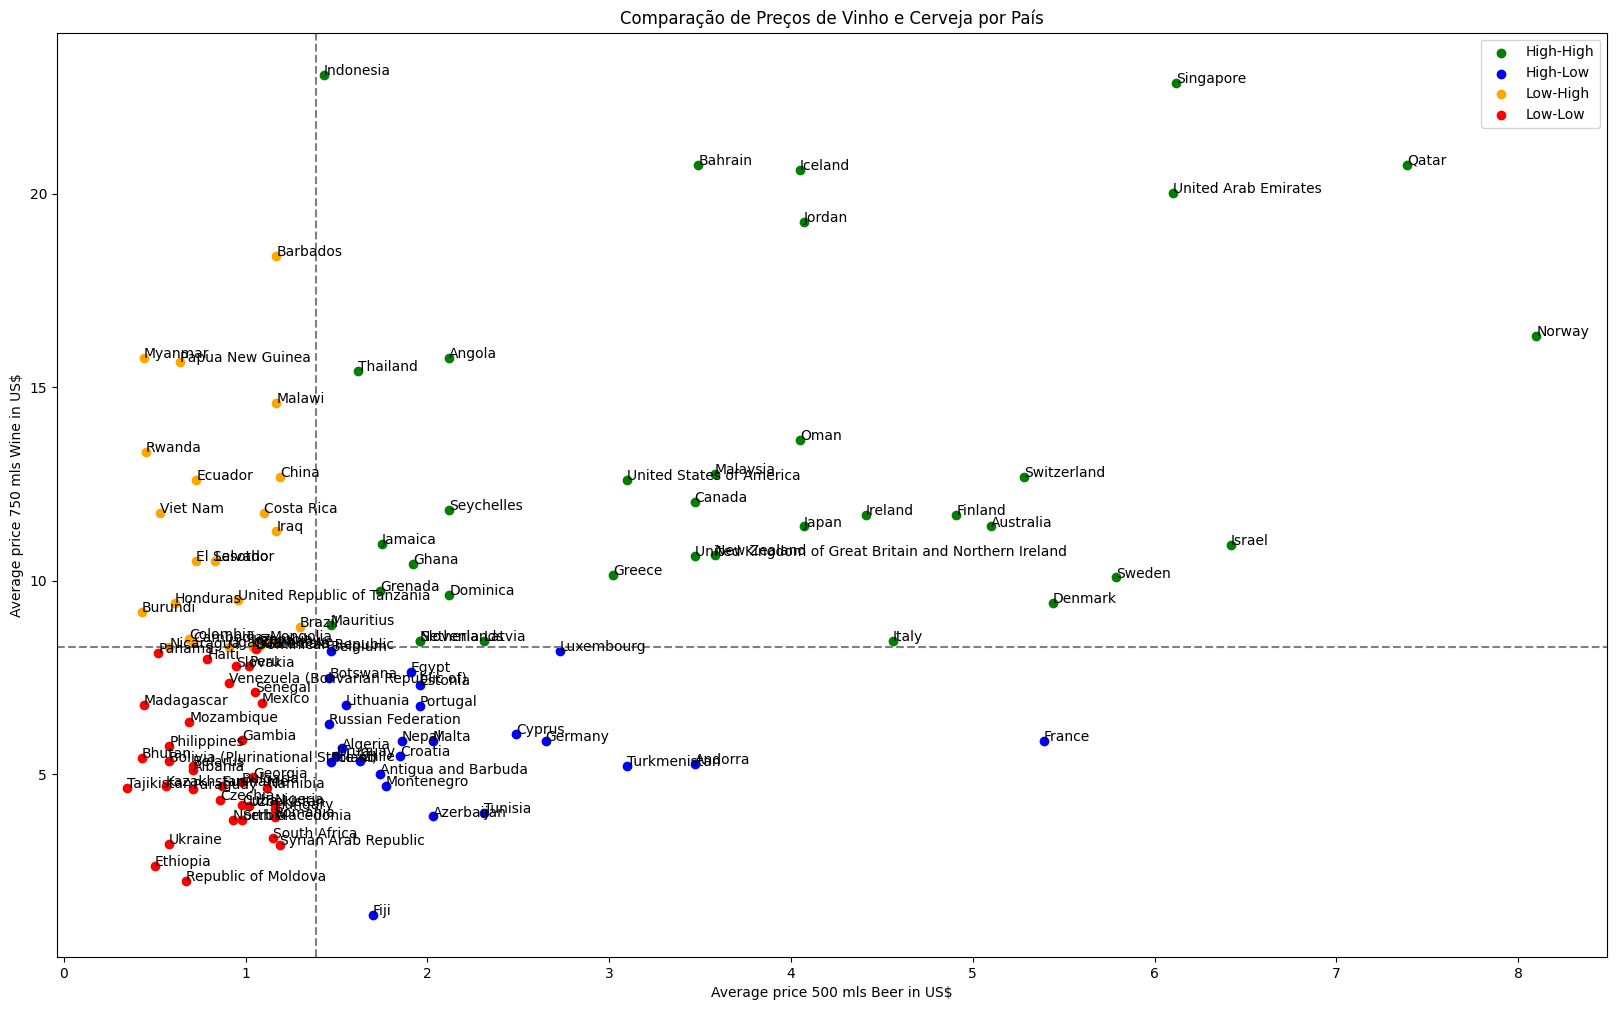

In [9]:
# Definir limites para cada quadrante
x_threshold = df_combined2['Average price 500 mls Beer in US$'].median()
y_threshold = df_combined2['Average price 750 mls Wine in US$'].median()

# Criar os quadrantes
high_high = df_combined2[(df_combined2['Average price 500 mls Beer in US$'] >= x_threshold) & (df_combined2['Average price 750 mls Wine in US$'] >= y_threshold)]
high_low = df_combined2[(df_combined2['Average price 500 mls Beer in US$'] >= x_threshold) & (df_combined2['Average price 750 mls Wine in US$'] < y_threshold)]
low_high = df_combined2[(df_combined2['Average price 500 mls Beer in US$'] < x_threshold) & (df_combined2['Average price 750 mls Wine in US$'] >= y_threshold)]
low_low = df_combined2[(df_combined2['Average price 500 mls Beer in US$'] < x_threshold) & (df_combined2['Average price 750 mls Wine in US$'] < y_threshold)]

fig, ax = plt.subplots(figsize=(20, 12))

# Plotar os pontos de cada quadrante com cores diferentes
ax.scatter(high_high['Average price 500 mls Beer in US$'], high_high['Average price 750 mls Wine in US$'], color='green', label='High-High')
ax.scatter(high_low['Average price 500 mls Beer in US$'], high_low['Average price 750 mls Wine in US$'], color='blue', label='High-Low')
ax.scatter(low_high['Average price 500 mls Beer in US$'], low_high['Average price 750 mls Wine in US$'], color='orange', label='Low-High')
ax.scatter(low_low['Average price 500 mls Beer in US$'], low_low['Average price 750 mls Wine in US$'], color='red', label='Low-Low')

# Adicionar as anotações com os nomes dos países
for pais in df_combined2.index:
    ax.annotate(pais, (df_combined2.loc[pais, 'Average price 500 mls Beer in US$'], df_combined2.loc[pais, 'Average price 750 mls Wine in US$']))

# Desenhar os quadrantes
ax.axvline(x_threshold, color='gray', linestyle='--')
ax.axhline(y_threshold, color='gray', linestyle='--')

# Definir os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Average price 500 mls Beer in US$')
ax.set_ylabel('Average price 750 mls Wine in US$')
ax.set_title('Comparação de Preços de Vinho e Cerveja por País')

# Adicionar uma legenda
ax.legend()

# Exibir o gráfico
plt.show()

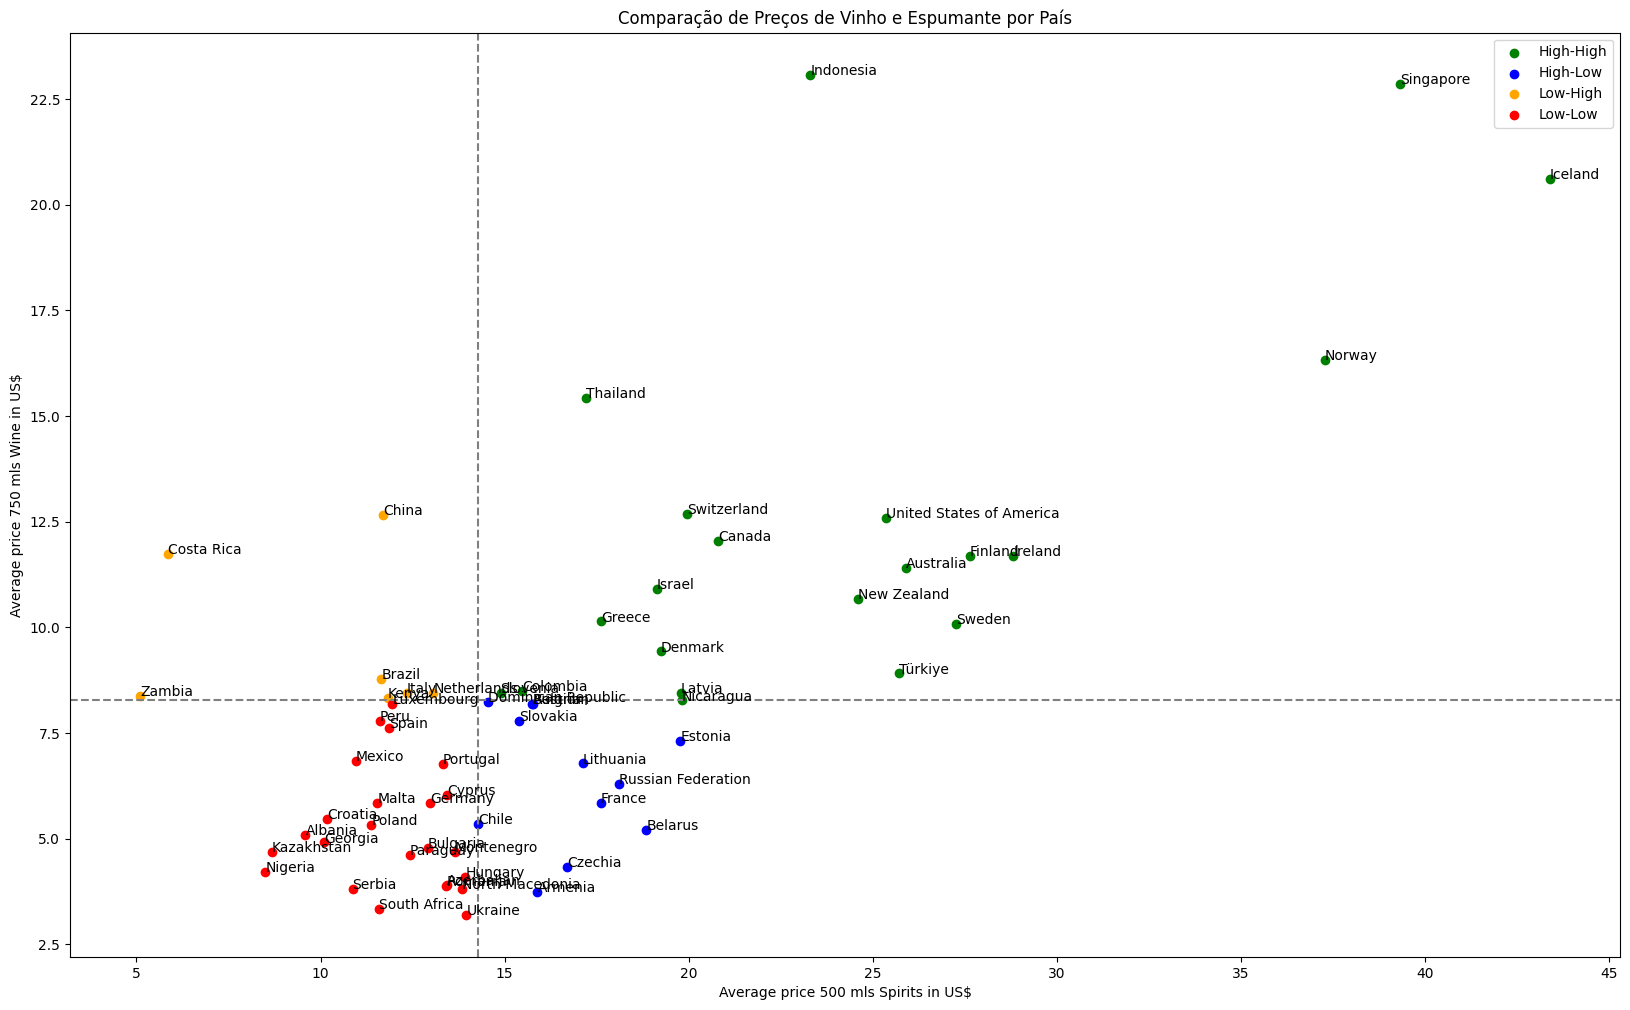

In [12]:
# Definir limites para cada quadrante
x_threshold = df_combined1['Average price 500 mls Spirits in US$'].median()
y_threshold = df_combined1['Average price 750 mls Wine in US$'].median()

# Criar os quadrantes
high_high = df_combined1[(df_combined1['Average price 500 mls Spirits in US$'] >= x_threshold) & (df_combined1['Average price 750 mls Wine in US$'] >= y_threshold)]
high_low = df_combined1[(df_combined1['Average price 500 mls Spirits in US$'] >= x_threshold) & (df_combined1['Average price 750 mls Wine in US$'] < y_threshold)]
low_high = df_combined1[(df_combined1['Average price 500 mls Spirits in US$'] < x_threshold) & (df_combined1['Average price 750 mls Wine in US$'] >= y_threshold)]
low_low = df_combined1[(df_combined1['Average price 500 mls Spirits in US$'] < x_threshold) & (df_combined1['Average price 750 mls Wine in US$'] < y_threshold)]

fig, ax = plt.subplots(figsize=(20, 12))

# Plotar os pontos de cada quadrante com cores diferentes
ax.scatter(high_high['Average price 500 mls Spirits in US$'], high_high['Average price 750 mls Wine in US$'], color='green', label='High-High')
ax.scatter(high_low['Average price 500 mls Spirits in US$'], high_low['Average price 750 mls Wine in US$'], color='blue', label='High-Low')
ax.scatter(low_high['Average price 500 mls Spirits in US$'], low_high['Average price 750 mls Wine in US$'], color='orange', label='Low-High')
ax.scatter(low_low['Average price 500 mls Spirits in US$'], low_low['Average price 750 mls Wine in US$'], color='red', label='Low-Low')

# Adicionar as anotações com os nomes dos países
for pais in df_combined1.index:
    ax.annotate(pais, (df_combined1.loc[pais, 'Average price 500 mls Spirits in US$'], df_combined1.loc[pais, 'Average price 750 mls Wine in US$']))

# Desenhar os quadrantes
ax.axvline(x_threshold, color='gray', linestyle='--')
ax.axhline(y_threshold, color='gray', linestyle='--')


# Definir os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Average price 500 mls Spirits in US$')
ax.set_ylabel('Average price 750 mls Wine in US$')
ax.set_title('Comparação de Preços de Vinho e Espumante por País')

# Adicionar uma legenda
ax.legend()

# Exibir o gráfico
plt.show()

In [14]:
df_abst = pd.read_csv('/content/Abstencao.csv', skiprows=1)
df_abst = df_abst.set_index('Countries, territories and areas')

df_abst = df_abst.rename(columns={' Both sexes': 'Alcohol, abstainers past 12 months (%) - both',' Male':'Alcohol, abstainers past 12 months (%) - M',' Female':'Alcohol, abstainers past 12 months (%) - F'})
#replaces e depois type
df_abst['Alcohol, abstainers past 12 months (%) - both'] = df_abst['Alcohol, abstainers past 12 months (%) - both'].replace('No data', float('nan'))
df_abst['Alcohol, abstainers past 12 months (%) - both'] = df_abst['Alcohol, abstainers past 12 months (%) - both'].astype(float)

df_abst['Alcohol, abstainers past 12 months (%) - M'] = df_abst['Alcohol, abstainers past 12 months (%) - M'].replace('No data', float('nan'))
df_abst['Alcohol, abstainers past 12 months (%) - M'] = df_abst['Alcohol, abstainers past 12 months (%) - M'].astype(float)

df_abst['Alcohol, abstainers past 12 months (%) - F'] = df_abst['Alcohol, abstainers past 12 months (%) - F'].replace('No data', float('nan'))
df_abst['Alcohol, abstainers past 12 months (%) - F'] = df_abst['Alcohol, abstainers past 12 months (%) - F'].astype(float)


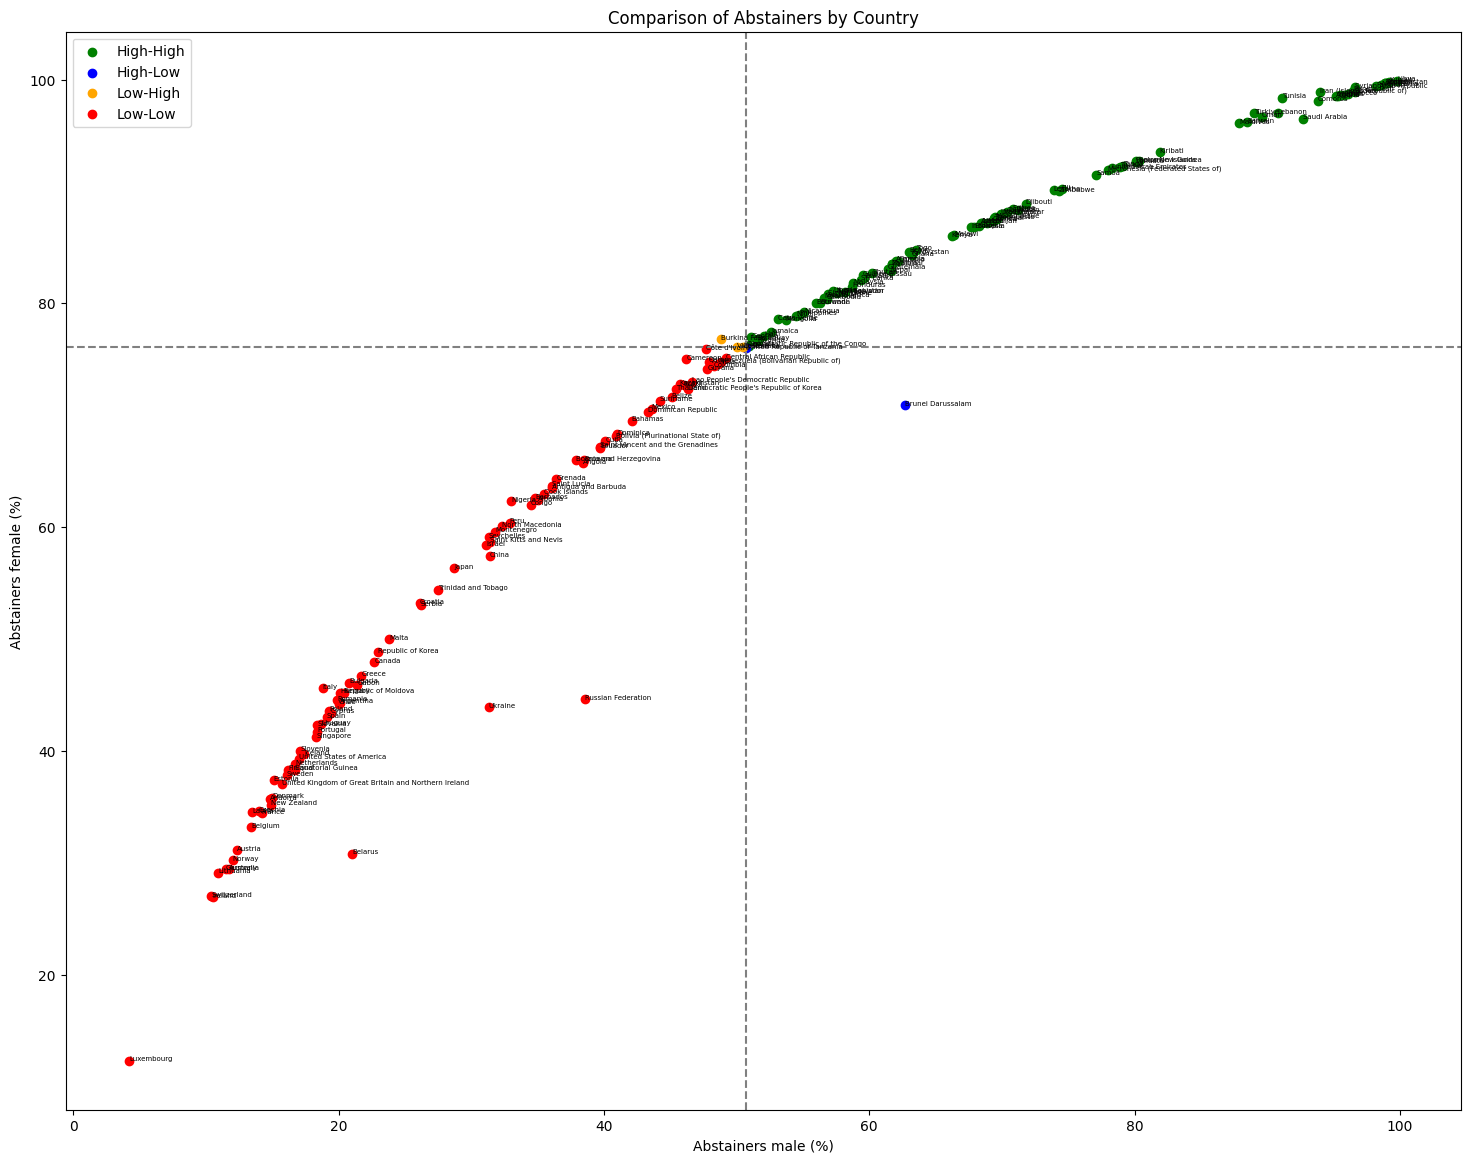

In [16]:
fig, ax = plt.subplots(figsize=(18, 14))


x_threshold = df_abst['Alcohol, abstainers past 12 months (%) - M'].median()
y_threshold = df_abst['Alcohol, abstainers past 12 months (%) - F'].median()

# Define the subsets based on thresholds
high_high = df_abst[(df_abst['Alcohol, abstainers past 12 months (%) - M'] >= x_threshold) & (df_abst['Alcohol, abstainers past 12 months (%) - F'] >= y_threshold)]
high_low = df_abst[(df_abst['Alcohol, abstainers past 12 months (%) - M'] >= x_threshold) & (df_abst['Alcohol, abstainers past 12 months (%) - F'] < y_threshold)]
low_high = df_abst[(df_abst['Alcohol, abstainers past 12 months (%) - M'] < x_threshold) & (df_abst['Alcohol, abstainers past 12 months (%) - F'] >= y_threshold)]
low_low = df_abst[(df_abst['Alcohol, abstainers past 12 months (%) - M'] < x_threshold) & (df_abst['Alcohol, abstainers past 12 months (%) - F'] < y_threshold)]

# Plot the points for each quadrant with different colors
ax.scatter(high_high['Alcohol, abstainers past 12 months (%) - M'], high_high['Alcohol, abstainers past 12 months (%) - F'], color='green', label='High-High')
ax.scatter(high_low['Alcohol, abstainers past 12 months (%) - M'], high_low['Alcohol, abstainers past 12 months (%) - F'], color='blue', label='High-Low')
ax.scatter(low_high['Alcohol, abstainers past 12 months (%) - M'], low_high['Alcohol, abstainers past 12 months (%) - F'], color='orange', label='Low-High')
ax.scatter(low_low['Alcohol, abstainers past 12 months (%) - M'], low_low['Alcohol, abstainers past 12 months (%) - F'], color='red', label='Low-Low')

# Add annotations with country names
for pais in df_abst.index:
    ax.annotate(pais, (df_abst.loc[pais, 'Alcohol, abstainers past 12 months (%) - M'], df_abst.loc[pais, 'Alcohol, abstainers past 12 months (%) - F']), fontsize = 5)

# Draw the quadrants
ax.axvline(x_threshold, color='gray', linestyle='--')
ax.axhline(y_threshold, color='gray', linestyle='--')

# Set axis labels and title
ax.set_xlabel('Abstainers male (%)')
ax.set_ylabel('Abstainers female (%)')
ax.set_title('Comparison of Abstainers by Country')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Slide 6: Demografia faz a diferença
O vinho como bebida tem preferência para o público de +60

Esquerda cima: demografia global - envelhecimento geral da população
Mas resta: como fazer as novas gerações que querem romper com a tradiação a gostarem de vinho?

Esquerda baixo: US vinho é mais gostado entre os velhos


In [25]:
df_age_world = pd.read_csv('/content/population-by-age-group-with-projections.csv')
#Fonte our world in data

,Entity,Code,Year,Population - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: medium,Population by broad age group - Sex: all - Age: 65+ - Variant: estimates,Population by broad age group - Sex: all - Age: 65+ - Variant: medium,Population by broad age group - Sex: all - Age: 25-64 - Variant: estimates,Population by broad age group - Sex: all - Age: 25-64 - Variant: medium,Population - Sex: all - Age: 0-24 - Variant: medium,Population - Sex: all - Age: 0-24 - Variant: estimates,Population - Sex: all - Age: 0-14 - Variant: estimates,Population - Sex: all - Age: 0-14 - Variant: medium,Population by broad age group - Sex: all - Age: 0-4 - Variant: estimates,Population by broad age group - Sex: all - Age: 0-4 - Variant: medium
0,Afghanistan,AFG,1950,7480464.0,NaN,213022.0,NaN,2773093.0,NaN,NaN,4494349.0,3068855.0,NaN,1248282.0,NaN
1,Afghanistan,AFG,1951,7571542.0,NaN,216096.0,NaN,2803308.0,NaN,NaN,4552138.0,3105444.0,NaN,1246857.0,NaN
2,Afghanistan,AFG,1952,7667534.0,NaN,219028.0,NaN,2834902.0,NaN,NaN,4613604.0,3145070.0,NaN,1248220.0,NaN
3,Afghanistan,AFG,1953,7764549.0,NaN,221925.0,NaN,2866392.0,NaN,NaN,4676232.0,3186382.0,NaN,1254725.0,NaN
4,Afghanistan,AFG,1954,7864289.0,NaN,224755.0,NaN,2898163.0,NaN,NaN,4741371.0,3231060.0,NaN,1267817.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38349,Zimbabwe,ZWE,2096,NaN,35469604.0,NaN,4770735.0,NaN,18519164.0,12179705.0,NaN,NaN,7192559.0,NaN,2356638.0
38350,Zimbabwe,ZWE,2097,NaN,35517800.0,NaN,4844016.0,NaN,18544366.0,12129416.0,NaN,NaN,7162506.0,NaN,2346510.0
38351,Zimbabwe,ZWE,2098,NaN,35561276.0,NaN,4918126.0,NaN,18564164.0,12078986.0,NaN,NaN,7133360.0,NaN,2336947.0
38352,Zimbabwe,ZWE,2099,NaN,35599776.0,NaN,4992923.0,NaN,18579802.0,12027052.0,NaN,NaN,7103115.0,NaN,2327263.0


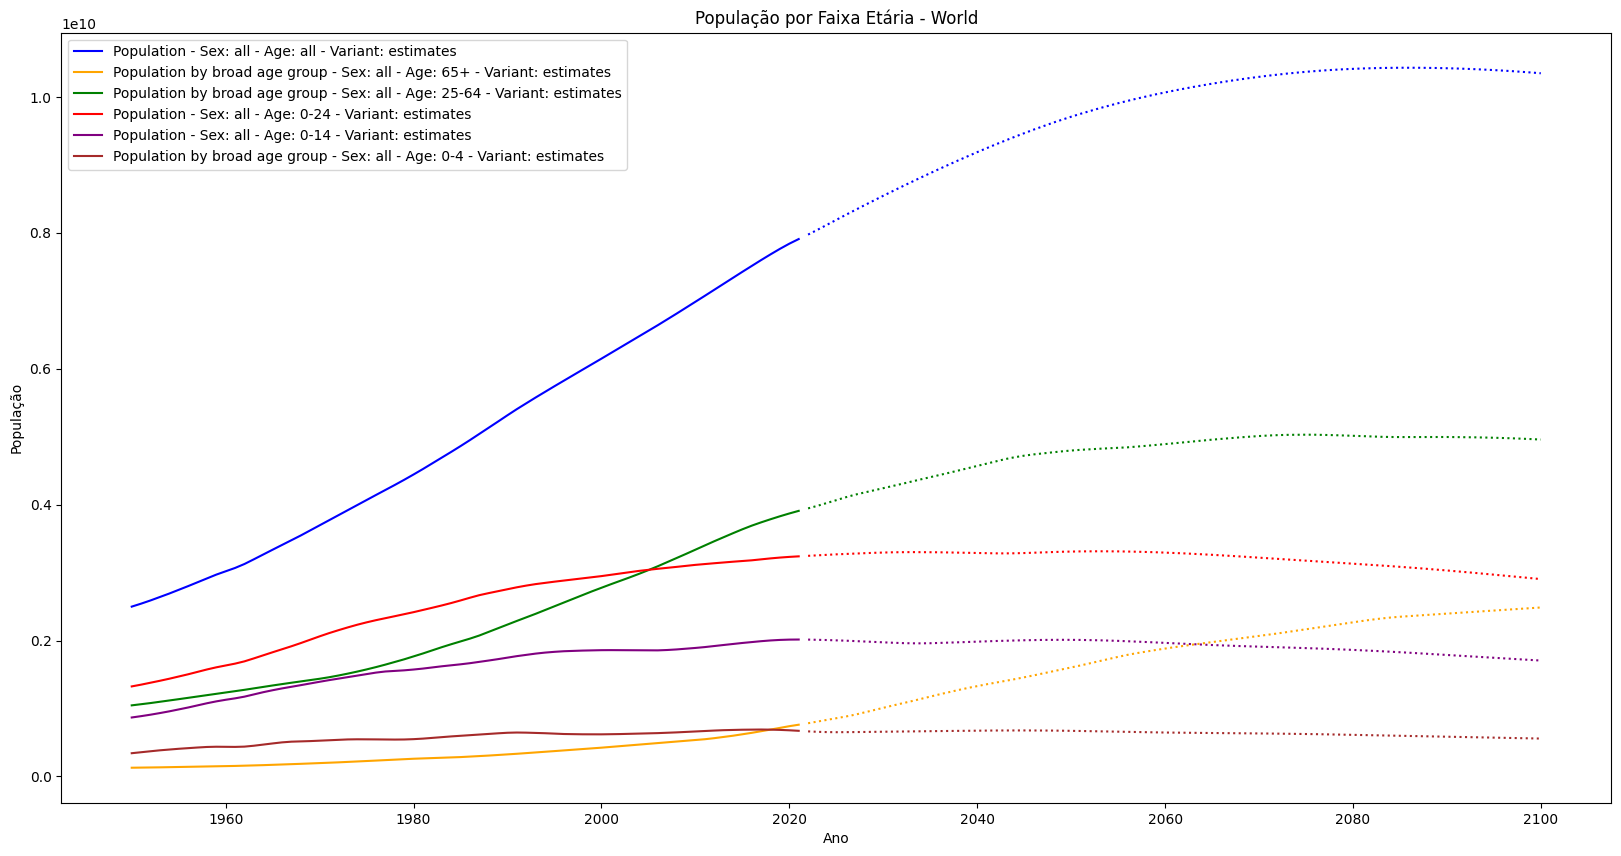

In [34]:
# Filtrar os dados para a entidade "World"
dados_world = df_age_world[df_age_world['Entity'] == 'World']

# Definir os anos e as colunas para as faixas etárias
anos = dados_world['Year'].values
pop_estimates = [
    'Population - Sex: all - Age: all - Variant: estimates',
    'Population by broad age group - Sex: all - Age: 65+ - Variant: estimates',
    'Population by broad age group - Sex: all - Age: 25-64 - Variant: estimates',
    'Population - Sex: all - Age: 0-24 - Variant: estimates',
    'Population - Sex: all - Age: 0-14 - Variant: estimates',
    'Population by broad age group - Sex: all - Age: 0-4 - Variant: estimates'
]
pop_medium = [
    'Population - Sex: all - Age: all - Variant: medium',
    'Population by broad age group - Sex: all - Age: 65+ - Variant: medium',
    'Population by broad age group - Sex: all - Age: 25-64 - Variant: medium',
    'Population - Sex: all - Age: 0-24 - Variant: medium',
    'Population - Sex: all - Age: 0-14 - Variant: medium',
    'Population by broad age group - Sex: all - Age: 0-4 - Variant: medium'
]

# Definir as cores para cada faixa etária
cores = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Criar o gráfico com todas as faixas etárias
fig, ax = plt.subplots(figsize=(20, 10))

# Plotar as linhas das faixas etárias
for i in range(len(pop_estimates)):
    estimates = pop_estimates[i]
    medium = pop_medium[i]
    cor = cores[i]

    ax.plot(anos, dados_world[estimates].values, label=estimates, color=cor)
    ax.plot(anos, dados_world[medium].values, linestyle='dotted', color=cor)

# Definir rótulos dos eixos e título do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('População')
ax.set_title('População por Faixa Etária - World')

# Adicionar legenda
ax.legend()

# Exibir o gráfico
plt.show()

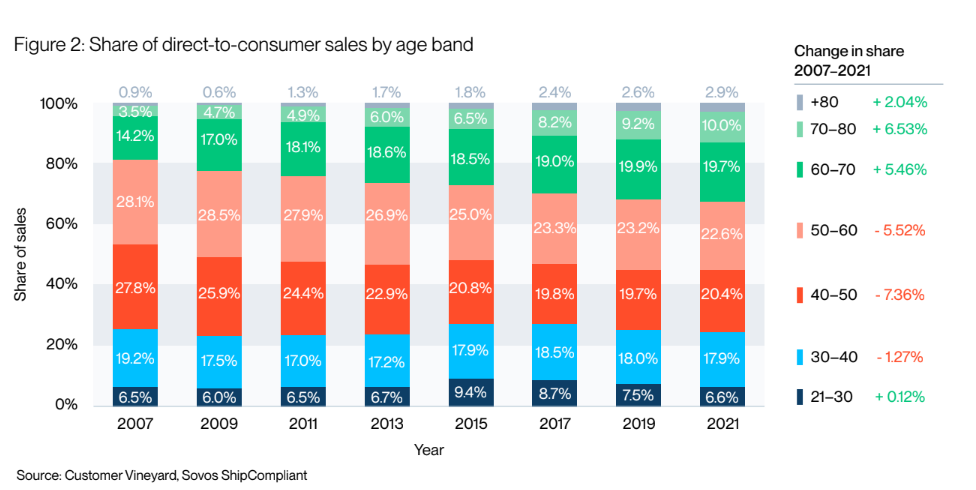

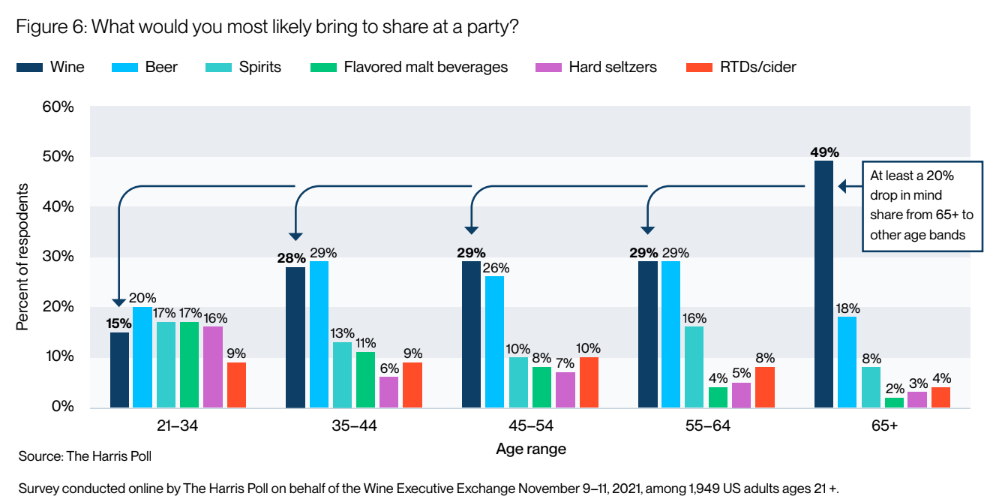

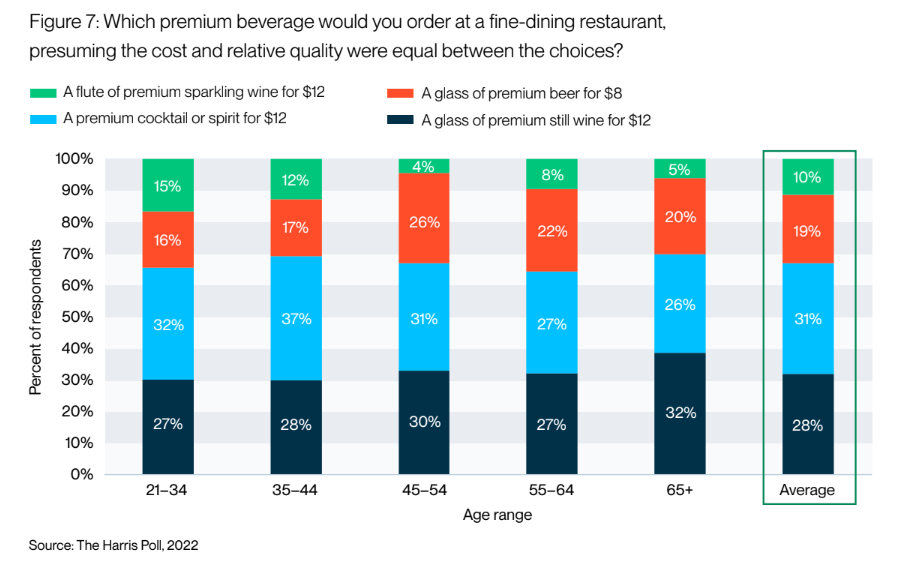

Slide 7: Canais de venda vinho

Listar todos os canais
Maior porta de entrada são os restaurantes e degustações


Esquerda: grafico EUA
Direita: grafico China

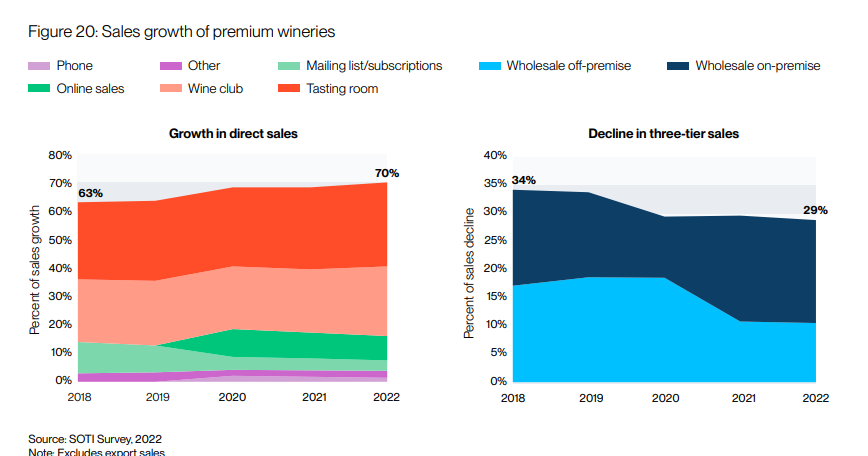

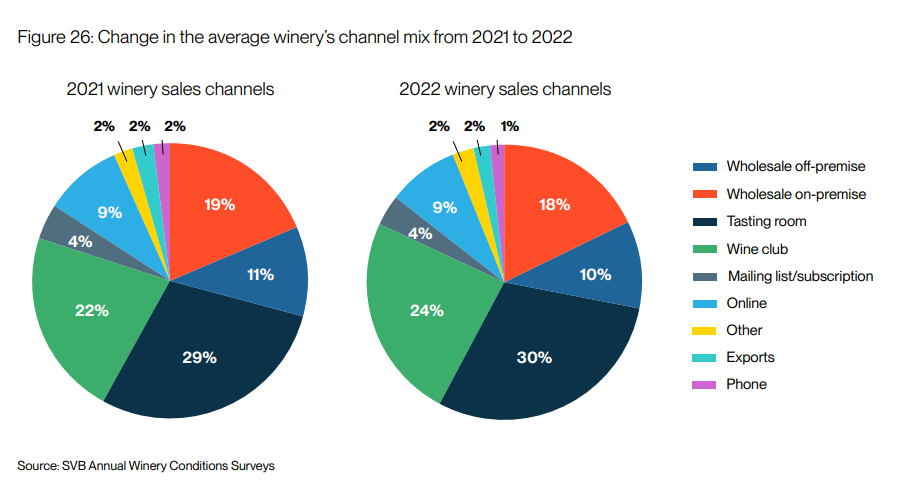

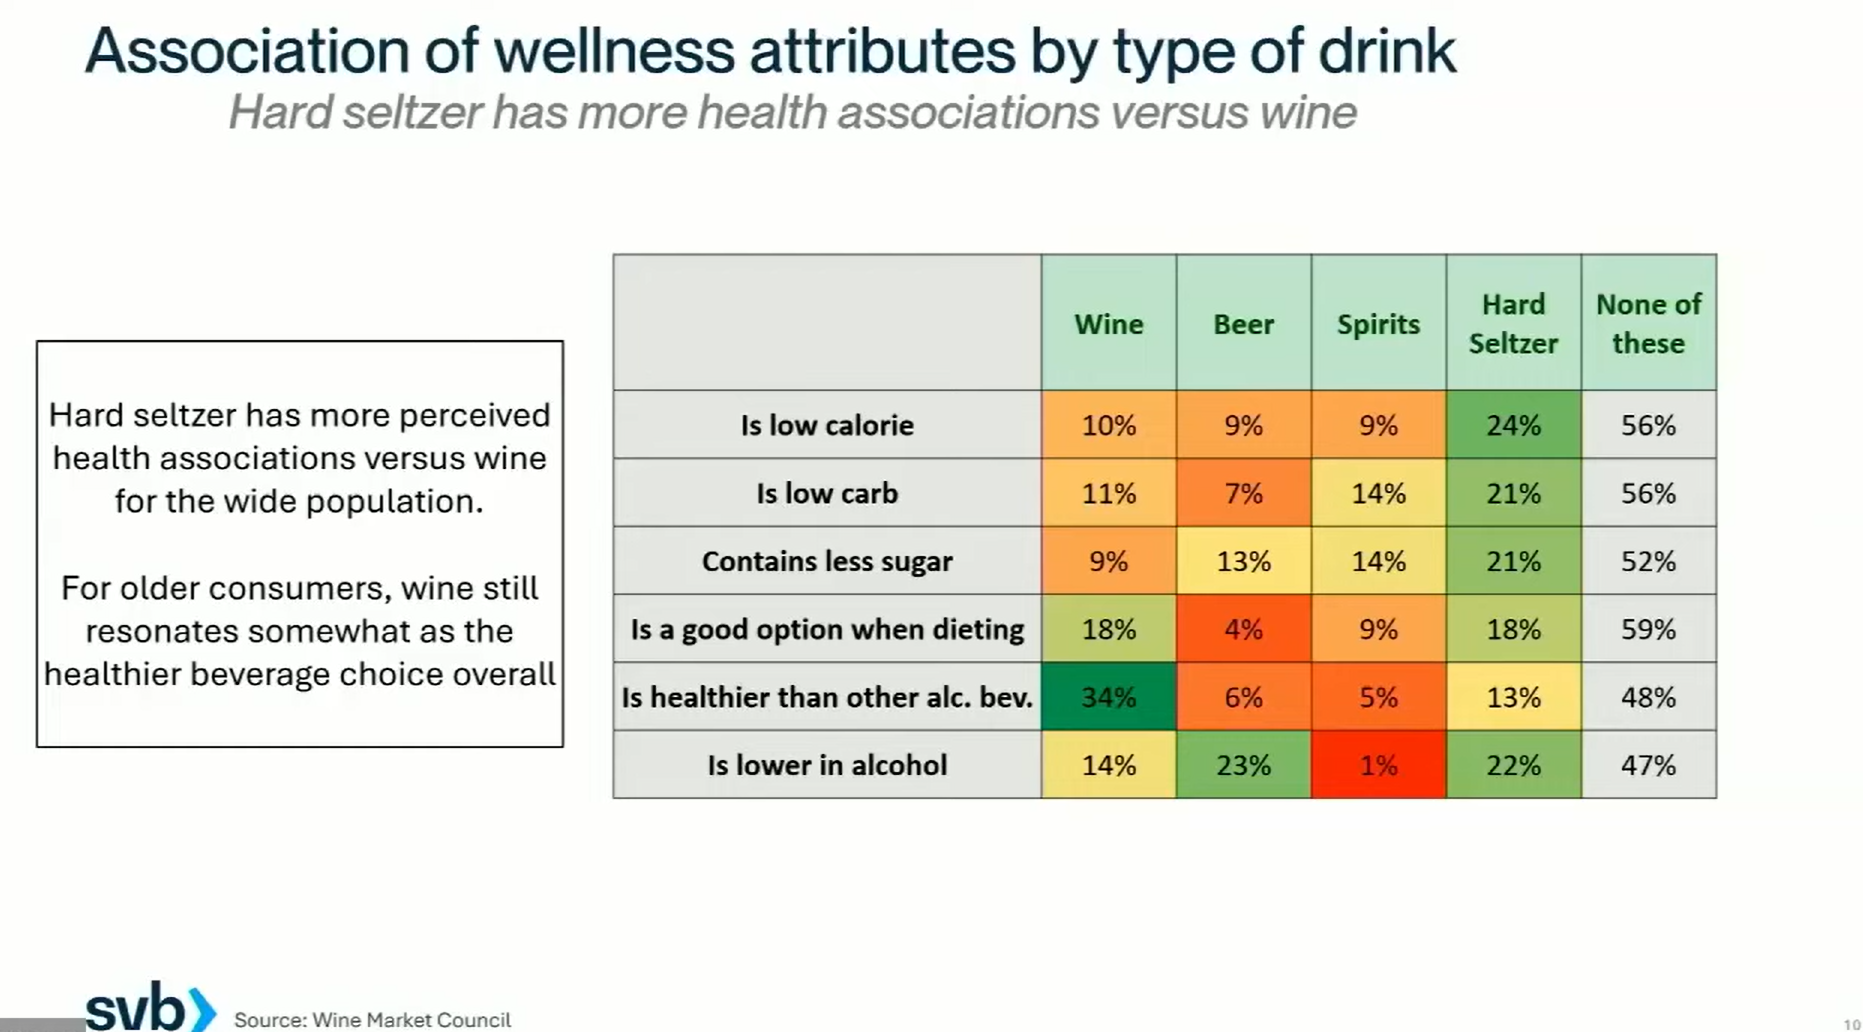

Consumo de vinho em litros

Fonte:https://ourworldindata.org/grapher/wine-consumption-per-person?tab=table

# Dolar

In [ ]:
df_dolar = pd.read_csv('https://api.bcb.gov.br/dados/serie/bcdata.sgs.1/dados?formato=csv', sep=';')
df_dolar['valor'] = df_dolar['valor'].str.replace(',', '.')
df_dolar['valor'] = pd.to_numeric(df_dolar['valor'])
df_dolar['data'] = pd.to_datetime(df_dolar['data'], format='%d/%m/%Y')



start_date = pd.Timestamp(datetime.datetime(2007, 1, 1))
end_date = pd.Timestamp(datetime.datetime(2023, 5, 31))

# Generate a range of dates from start_date to end_date
dates_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Filter the DataFrame for the last day of each month
new_df = df_dolar[df_dolar['data'].isin(dates_range)][df_dolar['data'].dt.is_month_end]

# Filtrar o DataFrame a partir da data x

# Display the end of month dates
new_df

<ipython-input-129-ff684c72cd2b>:15: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,data,valor
5546,2007-01-31,2.1247
5564,2007-02-28,2.1182
5606,2007-04-30,2.0339
5628,2007-05-31,1.9289
5670,2007-07-31,1.8776
...,...,...
9521,2022-11-30,5.2941
9565,2023-01-31,5.0993
9583,2023-02-28,5.2078
9606,2023-03-31,5.0804


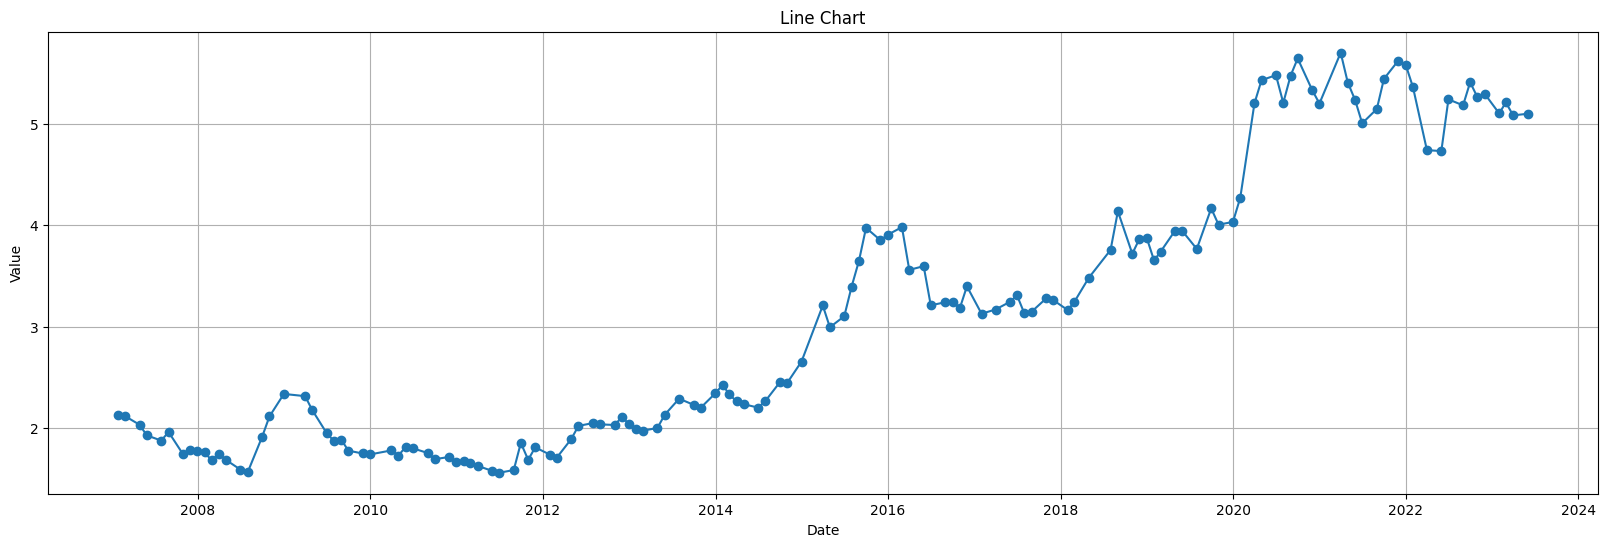

In [ ]:

plt.figure(figsize=(20, 6))
plt.plot(new_df['data'], new_df['valor'], marker='o')

plt.title('Line Chart')
plt.xlabel('Date')
plt.ylabel('Value')

plt.grid(True)
plt.show()

Melhorias
https://www.gov.br/empresas-e-negocios/pt-br/invest-export-brasil/exportar/conheca-os-mercados/pesquisas-de-mercado/estudo-de-mercado.pdf/Paraguai2021.pdf

Melhorias, penetrar na China com qualidade